# Explonatory Data Analysis

## 1.0 Imports

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## 2.0 First Date

### 2.1 Load Data

In [2]:
df = pd.read_csv('../data/raw/heart_disease_uci.csv')
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


### 2.2 General information

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


### 2.3 Statistical summary of the figures

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,920.0,460.500000,265.725422,1.0,230.75,460.5,690.25,920.0
age,920.0,53.510870,9.424685,28.0,47.00,54.0,60.00,77.0
trestbps,861.0,132.132404,19.066070,0.0,120.00,130.0,140.00,200.0
chol,890.0,199.130337,110.780810,0.0,175.00,223.0,268.00,603.0
thalch,865.0,137.545665,25.926276,60.0,120.00,140.0,157.00,202.0
oldpeak,858.0,0.878788,1.091226,-2.6,0.00,0.5,1.50,6.2
ca,309.0,0.676375,0.935653,0.0,0.00,0.0,1.00,3.0
num,920.0,0.995652,1.142693,0.0,0.00,1.0,2.00,4.0


### 2.3 Drop Not Important Culomns

In [5]:
df = df.drop(["id","dataset"], axis=1)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,63,Male,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,67,Male,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,67,Male,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,37,Male,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,41,Female,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


### 2.4 Checking missing values 

In [6]:
null_counts = df.isnull().sum()

print("Missing values by culomns:")
print(null_counts[null_counts > 0].sort_values(ascending=False))


null_percent = (df.isnull().sum() / len(df)) * 100
print("\nPercentage rate:")
print(null_percent[null_percent > 0].sort_values(ascending=False))

Missing values by culomns:
ca          611
thal        486
slope       309
fbs          90
oldpeak      62
trestbps     59
exang        55
thalch       55
chol         30
restecg       2
dtype: int64

Percentage rate:
ca          66.413043
thal        52.826087
slope       33.586957
fbs          9.782609
oldpeak      6.739130
trestbps     6.413043
exang        5.978261
thalch       5.978261
chol         3.260870
restecg      0.217391
dtype: float64


### 2.5 Replacing continuous variables with medians

In [7]:
continuous_cols = ['oldpeak', 'trestbps', 'thalch', 'chol']
for col in continuous_cols:
    if col in df.columns:
        df[col] = df[col].fillna(df[col].median())

### 2.6 Replacing categorical variables with the most common value 

In [8]:
categorical_to_fill = ['fbs', 'exang', 'restecg', 'slope']
for col in categorical_to_fill:
    cols_found = [c for c in df.columns if c.startswith(col)]
    for c in cols_found:
        df[c] = df[c].fillna(0)

### 2.7 Special case

In [9]:
df['ca'] = df['ca'].fillna('missing')
df['thal'] = df['thal'].fillna('missing')

### 2.9 Target variale (num) transpose.

In [10]:
df['target'] = df['num'].apply(lambda x: 1 if x > 0 else 0)

### 2.10 Check missing data

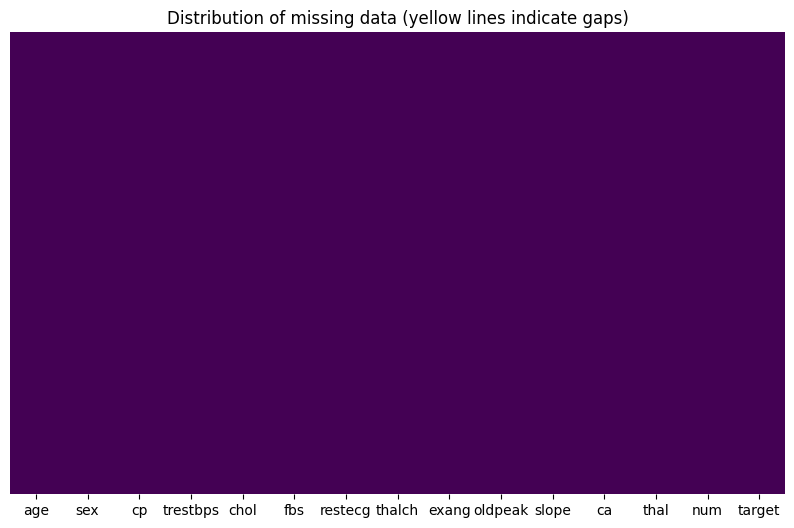

In [11]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.title('Distribution of missing data (yellow lines indicate gaps)')
plt.show()

## 3.0 EDA

### 3.1 The balance of the target variable

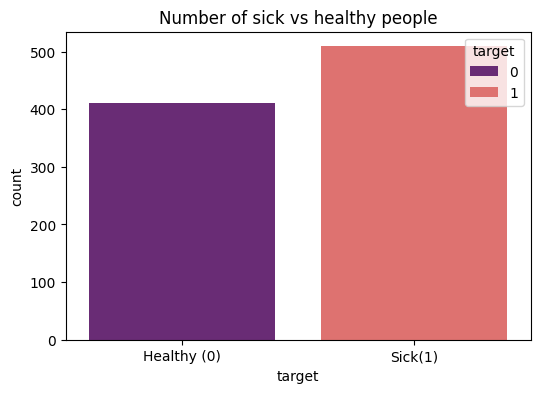

Sick people ratio: 55.33%


In [12]:
plt.figure(figsize=(6, 4))
sns.countplot(x='target', hue='target', data=df, palette='magma')
plt.xticks([0, 1], ['Healthy (0)', 'Sick(1)'])
plt.title('Number of sick vs healthy people')
plt.show()

print(f"Sick people ratio: {round(df['target'].mean()*100, 2)}%")

### 3.2 Analysis of continuous variables (Age, Chol, Trestbps)

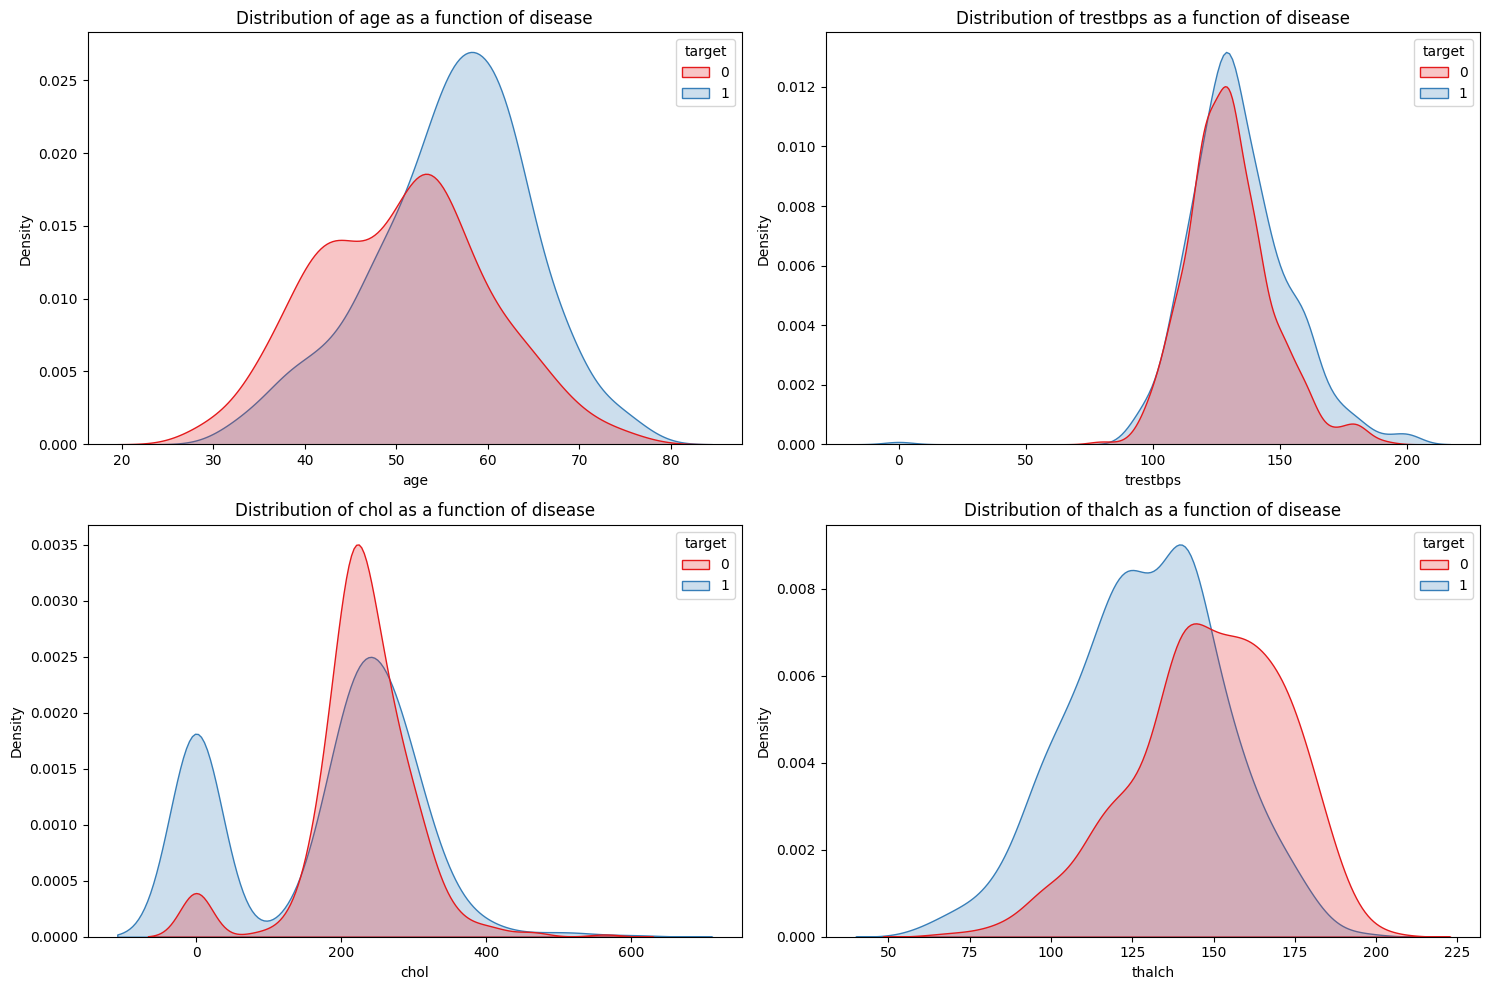

In [13]:
cols_to_plot = ['age', 'trestbps', 'chol', 'thalch']

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.flatten()

for i, col in enumerate(cols_to_plot):
    sns.kdeplot(data=df, x=col, hue='target', fill=True, ax=axes[i], palette='Set1')
    axes[i].set_title(f'Distribution of {col} as a function of disease')

plt.tight_layout()
plt.show()

### 3.3 Categorical variables and "Chest pain" (cp)

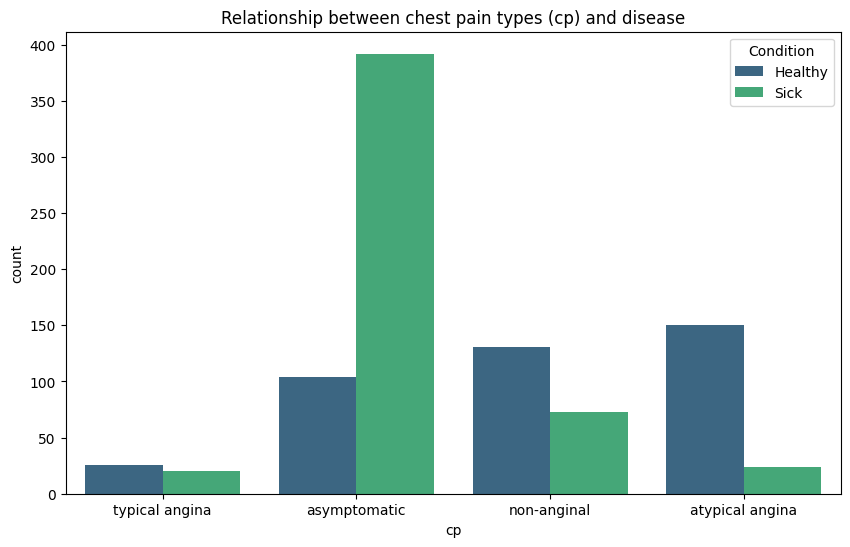

In [14]:
plt.figure(figsize=(10, 6))
sns.countplot(x='cp', hue='target', data=df, palette='viridis')
plt.title('Relationship between chest pain types (cp) and disease')
plt.legend(title='Condition', labels=['Healthy', 'Sick'])
plt.show()

### 3.4 Correlation Matrix

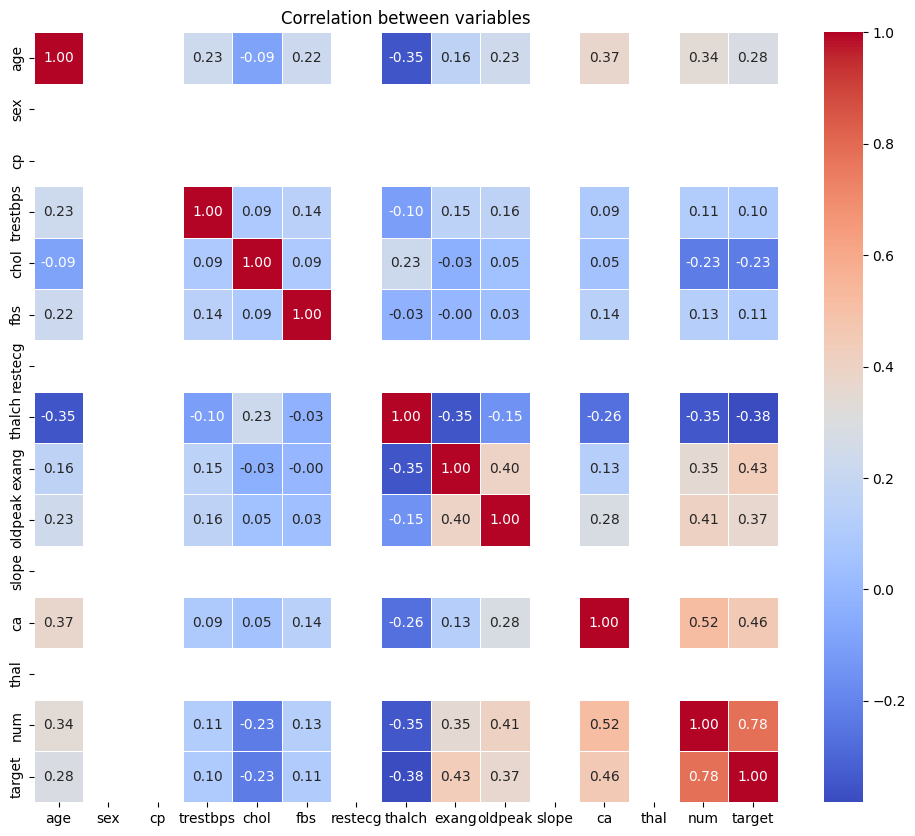

In [15]:
plt.figure(figsize=(12, 10))
numeric_df = df.apply(pd.to_numeric, errors='coerce')
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation between variables')
plt.show()